In [ ]:
!pip install surprise

import os
import json
import pandas as pd
import numpy as np
import scipy.sparse as sp
import torch

import matplotlib.pyplot as plt

from torch import nn


from pprint import pprint

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error



from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from surprise import SVD
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate


from tqdm import tqdm

seed = 0xAB0BA
np.random.seed(seed)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 771 kB 7.0 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp38-cp38-linux_x86_64.whl size=2626467 sha256=fbb1d81c377fa26b4d85ab6bbf102f6a05e8e8ede2f411e2d4da20235198084d
  Stored in directory: /root/.cache/pip/wheels/af/db/86/2c18183a80ba05da35bf0fb7417aac5cddbd93bcb1b92fd3ea
Successfully built scikit-surprise


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATA_PATH = '/content/drive/MyDrive/RecSys'


In [ ]:
ratings = pd.read_csv(
    os.path.join(DATA_PATH, 'ratings.csv'),
    dtype={
        'element_uid': np.uint16,
        'user_uid': np.uint32,
        'ts': np.float64,
        'rating': np.uint8
    }
)

ratings = ratings.sort_values(by=['ts'])
ratings.index=np.arange(len(ratings))


le_users = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
le_items = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

ratings['user_uid'] = le_users.fit_transform(ratings['user_uid'].values.reshape(-1,1))
ratings['element_uid'] = le_items.fit_transform(ratings['element_uid'].values.reshape(-1,1))

ratings['user_uid'] = ratings['user_uid'].astype(int)
ratings['element_uid'] = ratings['element_uid'].astype(int)

max_uid = ratings['user_uid'].max()
max_iid = ratings['element_uid'].max()

ratings.columns = ['user', 'item', 'rating', 'ts']

In [ ]:
# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(0, 10))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(ratings[["user", "item", "rating"]], reader)


trainset, testset = train_test_split(data, test_size=.30, random_state=999, shuffle=False)

# Считаем метрики SVD


Ниже рассмотрим несколько параметров для факторов SVD и помимо RMSE посчитаем еще и Accuracy после округления.

In [ ]:
n_comp = [1,3,5,8,10,12,15, 100]
res_rmse = []

for n in tqdm(n_comp):

    svd = SVD(n_factors = n)
    
    res = cross_validate(svd, data, measures=['RMSE'], cv=3, verbose=True)

    res_rmse.append(np.mean(res['test_rmse']))

 12%|█▎        | 1/8 [00:24<02:54, 24.92s/it]

Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.8228  1.8234  1.8218  1.8227  0.0006  
Fit time          4.51    4.20    3.92    4.21    0.24    
Test time         2.48    2.17    2.12    2.26    0.16    


 25%|██▌       | 2/8 [00:47<02:21, 23.53s/it]

Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.8380  1.8359  1.8332  1.8357  0.0019  
Fit time          4.03    3.74    4.04    3.93    0.14    
Test time         1.29    2.14    2.04    1.83    0.38    


 38%|███▊      | 3/8 [01:11<01:58, 23.69s/it]

Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.8466  1.8421  1.8388  1.8425  0.0032  
Fit time          4.17    3.88    4.44    4.17    0.23    
Test time         2.31    1.33    2.32    1.99    0.46    


 50%|█████     | 4/8 [01:34<01:33, 23.44s/it]

Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.8537  1.8464  1.8491  1.8497  0.0030  
Fit time          4.31    4.06    4.37    4.25    0.14    
Test time         2.17    2.05    2.17    2.13    0.06    


 62%|██████▎   | 5/8 [01:58<01:11, 23.73s/it]

Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.8483  1.8507  1.8534  1.8508  0.0021  
Fit time          4.38    4.31    4.44    4.38    0.05    
Test time         2.08    2.09    2.18    2.12    0.05    


 75%|███████▌  | 6/8 [02:22<00:47, 23.69s/it]

Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.8517  1.8483  1.8582  1.8527  0.0041  
Fit time          4.17    4.46    4.48    4.37    0.14    
Test time         2.07    2.31    2.16    2.18    0.10    


 88%|████████▊ | 7/8 [02:48<00:24, 24.39s/it]

Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.8573  1.8482  1.8538  1.8531  0.0037  
Fit time          4.56    4.32    5.51    4.80    0.51    
Test time         2.30    2.18    2.35    2.28    0.07    


100%|██████████| 8/8 [03:22<00:00, 25.28s/it]

Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.8649  1.8570  1.8502  1.8573  0.0060  
Fit time          7.74    7.75    7.69    7.73    0.02    
Test time         2.18    1.35    2.10    1.88    0.37    


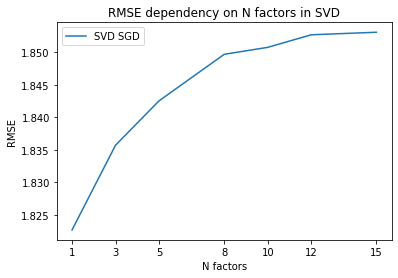

In [ ]:
plt.plot(n_comp[:-1], res_rmse[:-1], label='SVD SGD')
plt.xticks(n_comp[:-1])
plt.xlabel('N factors')
plt.ylabel('RMSE')
plt.title('RMSE dependency on N factors in SVD')
plt.legend()
plt.show()





In [ ]:
# константное предсказание средним по всему трейну

all_y = [elem[2] for elem in testset]
np.abs(all_y - trainset.global_mean).mean()

1.6164735418430938

In [ ]:
np.abs(np.array(all_y) - 10).mean() #константное предсказание 10

1.8111397251532624

Видим, что почти вне зависимости от факторов наш алгоритм дает RMSE в районе 1.83. Это кажется относительно неплохим результатом, по поводу зависимости мы видим, что чем больше параметров, тем хуже наша модель предсказывает, хоть и на  немного хуже. Однако интересно заметить, что я выше попробовал предсказать константно 2 раза - в одном случае средним, в другом максимумом и получил RMSE лучше чем предсказанный алгоритмом. Странный тренд, видимо он связан с разницей во вкусах пользователей и распределением с сильным пиком. Я также специально проверил результат с 100 факторами и 1 фактором как крайние случаи. Оказалось, что в случае с 1 фактором мы получаем лучший результат, который к слову очень близко к константному 10 предсказанию. но хуже чем предсказание глобальным максимумом. А с 100 факторами самый плохой


# NCF


Для NCF с входными разложениями SVD создадим датасет, который в трейне будет все подсчитывать и на выходе давать вектора из P и Q матриц, а на тесте он будет обращаться к этим матрицам если он знает юзера/айтема, а если не знает то будет брать средний вектор по этой матрице. Конечно это не лучшее решение, в лучшем случае правда стоит заменять глобальным средним, как скажем это сделано в библиотеке Surprise. Но в этом случае, нам пришлось бы рассматривать отдельно этих пользователей и для них не строить предсказание сеткой, а отбирать предварительно, так как торчевская сетка не делает исключений для входящих обьектов :) 

В качестве сети будем использовать полносвязную сеть, на вход которой подаются компоненты SVD разложения

In [ ]:
class Ratings(Dataset):
    def __init__(self, df, split='train', svd=None, hidden_size=5):


        if split == 'train':
            self.df = df
            self.iter_df = list(df.all_ratings())
        else:
            self.iter_df = df

        if split == 'train':
            self.svd = SVD(n_factors=hidden_size)
            self.svd.fit(self.df)
        else:
            self.svd = svd
            self.meanpu = self.svd.pu.mean(axis=0)
            self.meanqi = self.svd.qi.mean(axis=0)


    def __len__(self,):
        
        length = len(self.iter_df)

        return length

    def __getitem__(self, idx):

        row = self.iter_df[idx]
        r = torch.tensor(row[2])

        user_id = row[0]
        element_id = row[1]

        try:
            user_vector = self.svd.pu[user_id]
        except IndexError:
            user_vector = self.meanpu

        try:
            item_vector = self.svd.qi[element_id]
        except IndexError:
            item_vector = self.meanqi


        return torch.from_numpy(user_vector).float(), torch.from_numpy(item_vector).float(), r.float()




In [ ]:
class NCF(nn.Module):

    def __init__(self, hiddens, embedding_dim, activation_type='Relu'):
        super(NCF, self).__init__()

        model_hidden = []
        self.hiddens = hiddens
        n_layers = len(hiddens)
        


        self.linear1 = torch.nn.Linear(embedding_dim*2, self.hiddens[0])

        self.activation = torch.nn.ReLU(True)

        for i in range(0, n_layers-1):
            layer = nn.Sequential(nn.Dropout(p=0.3),
          torch.nn.Linear(self.hiddens[i] ,self.hiddens[i+1]),
          self.activation)
            model_hidden.append(layer)

        self.outLinear = nn.Linear(self.hiddens[-1], 1)

        self.net = nn.Sequential(
            self.linear1,
            self.activation,
            *model_hidden,
            self.outLinear
        )

    def forward(self, user_x, item_x):


        x = torch.cat((user_x, item_x), dim=1)
        

        out = self.net(x)

        return out

In [ ]:
def run_epoch(stage, model, dataloader, loss_fn, optimizer, epoch, device):

    if stage == "train":
        model.train()
        torch.set_grad_enabled(True)
    else:
        torch.set_grad_enabled(False)
        model.eval()

    model = model.to(device)
    
    losses = []
    for batch in tqdm(dataloader, total=len(dataloader), desc=f"epoch: {str(epoch).zfill(3)} | {stage:5}"):
        uid, eid, r = batch

        uid = uid.to(device)
        eid = eid.to(device)

                
        r_pred = model(uid, eid)

        #r = r.to(torch.float32)
        loss = loss_fn(r_pred, r.to(device)) #.float()
       # print(loss.float())

        if stage == "train":
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
                
        losses.append(loss.detach().cpu().item())
    

    return np.sqrt(np.mean(losses))

def run_experiment(model, dataloader_train, dataloader_val, loss_fn, optimizer, num_epochs, device, output_dir):
    
    train_losses = []
    val_losses = []

    best_val_loss = np.inf
    best_val_loss_epoch = -1
    best_val_loss_fn = None

    os.makedirs(output_dir, exist_ok=True)

    for epoch in range(num_epochs):
        train_loss = run_epoch("train", model, dataloader_train, loss_fn, optimizer, epoch, device)
        train_losses.append(train_loss)

        val_loss = run_epoch("val", model, dataloader_val, loss_fn, optimizer, epoch, device)
        val_losses.append(val_loss)

        print(f"epoch: {str(epoch).zfill(3)} | train_loss: {train_loss:5.3f}, val_loss: {val_loss:5.3f} (best: {best_val_loss:5.3f})")

        if val_loss < best_val_loss:

            best_val_loss = val_loss
            best_val_loss_epoch = epoch

            output_fn = os.path.join(output_dir, f"epoch={str(epoch).zfill(2)}_valloss={best_val_loss:.3f}.pth.tar")
            save_checkpoint(model, output_fn)
            print(f"New checkpoint saved to {output_fn}")

            best_val_loss_fn = output_fn

        print()

    print (f"Best val_loss = {best_val_loss:.3f} reached at epoch {best_val_loss_epoch}")
   # load_checkpoint(model, best_val_loss_fn)

    return train_losses, val_losses, best_val_loss, model


def save_checkpoint(model, filename):

    with open(filename, "wb") as fp:
        torch.save(model.state_dict(), fp)

def load_checkpoint(model, filename):

    with open(filename, "rb") as fp:
        state_dict = torch.load(fp, map_location="cpu")
    
    model.load_state_dict(state_dict)

In [ ]:
BS = 512
lr = 3e-4
num_epochs = 20
device = 'cuda'
hiddens = [128, 128, 128]
dim_emb = 8

train_dataset = Ratings(trainset, hidden_size=dim_emb)
test_dataset = Ratings(testset, split='test', svd=train_dataset.svd)

train_dataloader = DataLoader(train_dataset, batch_size=BS, num_workers=0, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=BS, num_workers=0, shuffle=False)



model = NCF(hiddens, dim_emb)

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = lr)

train_losses_baseline, val_losses_baseline, best_val_loss_baseline, cnn_baseline = run_experiment(
    model, train_dataloader, test_dataloader, loss_fn, optimizer, num_epochs, device, '/content/drive/MyDrive/Ozon/NCF'
)

epoch: 000 | train:   0%|          | 0/600 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([512])) that is different to the input size (torch.Size([512, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
epoch: 000 | train:  99%|█████████▊| 592/600 [00:09<00:00, 87.73it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([465])) that is different to the input size (torch.Size([465, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
epoch: 000 | train: 100%|██████████| 600/600 [00:09<00:00, 64.38it/s]
epoch: 000 | val  :  98%|█████████▊| 252/258 [00:02<00:00, 103.70it/s]/usr/local/lib/python3.8/dist-packages/t

epoch: 000 | train_loss: 3.474, val_loss: 2.082 (best:   inf)
New checkpoint saved to /content/drive/MyDrive/Ozon/NCF/epoch=00_valloss=2.082.pth.tar



epoch: 001 | train: 100%|██████████| 600/600 [00:07<00:00, 82.78it/s]
epoch: 001 | val  : 100%|██████████| 258/258 [00:02<00:00, 94.06it/s] 


epoch: 001 | train_loss: 2.233, val_loss: 2.079 (best: 2.082)
New checkpoint saved to /content/drive/MyDrive/Ozon/NCF/epoch=01_valloss=2.079.pth.tar



epoch: 002 | train: 100%|██████████| 600/600 [00:07<00:00, 81.66it/s]
epoch: 002 | val  : 100%|██████████| 258/258 [00:02<00:00, 107.41it/s]


epoch: 002 | train_loss: 2.158, val_loss: 2.076 (best: 2.079)
New checkpoint saved to /content/drive/MyDrive/Ozon/NCF/epoch=02_valloss=2.076.pth.tar



epoch: 003 | train: 100%|██████████| 600/600 [00:07<00:00, 81.71it/s]
epoch: 003 | val  : 100%|██████████| 258/258 [00:02<00:00, 100.22it/s]


epoch: 003 | train_loss: 2.138, val_loss: 2.075 (best: 2.076)
New checkpoint saved to /content/drive/MyDrive/Ozon/NCF/epoch=03_valloss=2.075.pth.tar



epoch: 004 | train: 100%|██████████| 600/600 [00:07<00:00, 83.92it/s]
epoch: 004 | val  : 100%|██████████| 258/258 [00:02<00:00, 105.18it/s]


epoch: 004 | train_loss: 2.129, val_loss: 2.077 (best: 2.075)



epoch: 005 | train: 100%|██████████| 600/600 [00:07<00:00, 83.11it/s]
epoch: 005 | val  : 100%|██████████| 258/258 [00:02<00:00, 107.72it/s]


epoch: 005 | train_loss: 2.122, val_loss: 2.078 (best: 2.075)



epoch: 006 | train: 100%|██████████| 600/600 [00:07<00:00, 84.66it/s]
epoch: 006 | val  : 100%|██████████| 258/258 [00:02<00:00, 105.93it/s]


epoch: 006 | train_loss: 2.117, val_loss: 2.076 (best: 2.075)



epoch: 007 | train: 100%|██████████| 600/600 [00:07<00:00, 83.97it/s]
epoch: 007 | val  : 100%|██████████| 258/258 [00:02<00:00, 105.40it/s]


epoch: 007 | train_loss: 2.112, val_loss: 2.075 (best: 2.075)
New checkpoint saved to /content/drive/MyDrive/Ozon/NCF/epoch=07_valloss=2.075.pth.tar



epoch: 008 | train: 100%|██████████| 600/600 [00:07<00:00, 83.92it/s]
epoch: 008 | val  : 100%|██████████| 258/258 [00:02<00:00, 98.35it/s] 


epoch: 008 | train_loss: 2.106, val_loss: 2.075 (best: 2.075)



epoch: 009 | train: 100%|██████████| 600/600 [00:07<00:00, 83.04it/s]
epoch: 009 | val  : 100%|██████████| 258/258 [00:02<00:00, 96.45it/s]


epoch: 009 | train_loss: 2.102, val_loss: 2.075 (best: 2.075)



epoch: 010 | train: 100%|██████████| 600/600 [00:07<00:00, 79.31it/s]
epoch: 010 | val  : 100%|██████████| 258/258 [00:05<00:00, 49.68it/s]


epoch: 010 | train_loss: 2.098, val_loss: 2.075 (best: 2.075)
New checkpoint saved to /content/drive/MyDrive/Ozon/NCF/epoch=10_valloss=2.075.pth.tar



epoch: 011 | train: 100%|██████████| 600/600 [00:09<00:00, 60.12it/s]
epoch: 011 | val  : 100%|██████████| 258/258 [00:02<00:00, 105.19it/s]


epoch: 011 | train_loss: 2.094, val_loss: 2.075 (best: 2.075)



epoch: 012 | train: 100%|██████████| 600/600 [00:07<00:00, 81.62it/s]
epoch: 012 | val  : 100%|██████████| 258/258 [00:03<00:00, 70.43it/s]


epoch: 012 | train_loss: 2.090, val_loss: 2.078 (best: 2.075)



epoch: 013 | train: 100%|██████████| 600/600 [00:07<00:00, 81.79it/s]
epoch: 013 | val  : 100%|██████████| 258/258 [00:02<00:00, 100.90it/s]


epoch: 013 | train_loss: 2.087, val_loss: 2.076 (best: 2.075)



epoch: 014 | train: 100%|██████████| 600/600 [00:07<00:00, 83.86it/s]
epoch: 014 | val  : 100%|██████████| 258/258 [00:02<00:00, 98.32it/s]


epoch: 014 | train_loss: 2.085, val_loss: 2.076 (best: 2.075)



epoch: 015 | train: 100%|██████████| 600/600 [00:07<00:00, 83.72it/s]
epoch: 015 | val  : 100%|██████████| 258/258 [00:02<00:00, 97.58it/s]


epoch: 015 | train_loss: 2.082, val_loss: 2.075 (best: 2.075)



epoch: 016 | train: 100%|██████████| 600/600 [00:07<00:00, 82.97it/s]
epoch: 016 | val  : 100%|██████████| 258/258 [00:02<00:00, 105.38it/s]


epoch: 016 | train_loss: 2.081, val_loss: 2.078 (best: 2.075)



epoch: 017 | train: 100%|██████████| 600/600 [00:07<00:00, 79.41it/s]
epoch: 017 | val  : 100%|██████████| 258/258 [00:02<00:00, 96.65it/s] 


epoch: 017 | train_loss: 2.079, val_loss: 2.075 (best: 2.075)



epoch: 018 | train: 100%|██████████| 600/600 [00:07<00:00, 82.09it/s]
epoch: 018 | val  : 100%|██████████| 258/258 [00:02<00:00, 97.31it/s]


epoch: 018 | train_loss: 2.078, val_loss: 2.078 (best: 2.075)



epoch: 019 | train: 100%|██████████| 600/600 [00:07<00:00, 81.26it/s]
epoch: 019 | val  : 100%|██████████| 258/258 [00:02<00:00, 99.29it/s]

epoch: 019 | train_loss: 2.077, val_loss: 2.075 (best: 2.075)

Best val_loss = 2.075 reached at epoch 10


In [ ]:
BS = 512
lr = 3e-4
num_epochs = 20
device = 'cuda'
hiddens = [128, 128, 128]
dim_emb = 10

train_dataset = Ratings(trainset, hidden_size=dim_emb)
test_dataset = Ratings(testset, split='test', svd=train_dataset.svd)

train_dataloader = DataLoader(train_dataset, batch_size=BS, num_workers=0, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=BS, num_workers=0, shuffle=False)



model = NCF(hiddens, dim_emb)

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = lr)

train_losses_baseline, val_losses_baseline, best_val_loss_baseline, cnn_baseline = run_experiment(
    model, train_dataloader, test_dataloader, loss_fn, optimizer, num_epochs, device, '/content/drive/MyDrive/Ozon/NCF'
)

epoch: 000 | train:   0%|          | 0/600 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([512])) that is different to the input size (torch.Size([512, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
epoch: 000 | train: 100%|█████████▉| 599/600 [00:09<00:00, 30.56it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([465])) that is different to the input size (torch.Size([465, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
epoch: 000 | train: 100%|██████████| 600/600 [00:09<00:00, 62.94it/s]
epoch: 000 | val  :  99%|█████████▉| 255/258 [00:07<00:00, 37.60it/s]/usr/local/lib/python3.8/dist-packages/to

epoch: 000 | train_loss: 3.553, val_loss: 2.078 (best:   inf)
New checkpoint saved to /content/drive/MyDrive/Ozon/NCF/epoch=00_valloss=2.078.pth.tar



epoch: 001 | train: 100%|██████████| 600/600 [00:08<00:00, 70.99it/s]
epoch: 001 | val  : 100%|██████████| 258/258 [00:02<00:00, 100.72it/s]


epoch: 001 | train_loss: 2.250, val_loss: 2.078 (best: 2.078)



epoch: 002 | train: 100%|██████████| 600/600 [00:08<00:00, 71.09it/s]
epoch: 002 | val  : 100%|██████████| 258/258 [00:02<00:00, 94.70it/s] 


epoch: 002 | train_loss: 2.172, val_loss: 2.075 (best: 2.078)
New checkpoint saved to /content/drive/MyDrive/Ozon/NCF/epoch=02_valloss=2.075.pth.tar



epoch: 003 | train: 100%|██████████| 600/600 [00:08<00:00, 70.62it/s]
epoch: 003 | val  : 100%|██████████| 258/258 [00:02<00:00, 94.88it/s] 


epoch: 003 | train_loss: 2.142, val_loss: 2.075 (best: 2.075)



epoch: 004 | train: 100%|██████████| 600/600 [00:08<00:00, 72.18it/s]
epoch: 004 | val  : 100%|██████████| 258/258 [00:02<00:00, 101.69it/s]


epoch: 004 | train_loss: 2.130, val_loss: 2.076 (best: 2.075)



epoch: 005 | train: 100%|██████████| 600/600 [00:08<00:00, 71.82it/s]
epoch: 005 | val  : 100%|██████████| 258/258 [00:02<00:00, 100.87it/s]


epoch: 005 | train_loss: 2.124, val_loss: 2.076 (best: 2.075)



epoch: 006 | train: 100%|██████████| 600/600 [00:08<00:00, 71.02it/s]
epoch: 006 | val  : 100%|██████████| 258/258 [00:02<00:00, 98.08it/s]


epoch: 006 | train_loss: 2.119, val_loss: 2.075 (best: 2.075)
New checkpoint saved to /content/drive/MyDrive/Ozon/NCF/epoch=06_valloss=2.075.pth.tar



epoch: 007 | train: 100%|██████████| 600/600 [00:09<00:00, 60.40it/s]
epoch: 007 | val  : 100%|██████████| 258/258 [00:02<00:00, 94.86it/s]


epoch: 007 | train_loss: 2.114, val_loss: 2.076 (best: 2.075)



epoch: 008 | train: 100%|██████████| 600/600 [00:08<00:00, 70.45it/s]
epoch: 008 | val  : 100%|██████████| 258/258 [00:02<00:00, 94.60it/s]


epoch: 008 | train_loss: 2.109, val_loss: 2.079 (best: 2.075)



epoch: 009 | train: 100%|██████████| 600/600 [00:08<00:00, 72.08it/s]
epoch: 009 | val  : 100%|██████████| 258/258 [00:02<00:00, 94.31it/s] 


epoch: 009 | train_loss: 2.105, val_loss: 2.075 (best: 2.075)



epoch: 010 | train: 100%|██████████| 600/600 [00:08<00:00, 71.37it/s]
epoch: 010 | val  : 100%|██████████| 258/258 [00:02<00:00, 97.33it/s]


epoch: 010 | train_loss: 2.101, val_loss: 2.075 (best: 2.075)
New checkpoint saved to /content/drive/MyDrive/Ozon/NCF/epoch=10_valloss=2.075.pth.tar



epoch: 011 | train: 100%|██████████| 600/600 [00:08<00:00, 72.23it/s]
epoch: 011 | val  : 100%|██████████| 258/258 [00:02<00:00, 94.73it/s]


epoch: 011 | train_loss: 2.097, val_loss: 2.075 (best: 2.075)
New checkpoint saved to /content/drive/MyDrive/Ozon/NCF/epoch=11_valloss=2.075.pth.tar



epoch: 012 | train: 100%|██████████| 600/600 [00:08<00:00, 70.76it/s]
epoch: 012 | val  : 100%|██████████| 258/258 [00:02<00:00, 97.05it/s]


epoch: 012 | train_loss: 2.093, val_loss: 2.075 (best: 2.075)



epoch: 013 | train: 100%|██████████| 600/600 [00:08<00:00, 71.20it/s]
epoch: 013 | val  : 100%|██████████| 258/258 [00:02<00:00, 96.45it/s] 


epoch: 013 | train_loss: 2.089, val_loss: 2.076 (best: 2.075)



epoch: 014 | train: 100%|██████████| 600/600 [00:08<00:00, 71.84it/s]
epoch: 014 | val  : 100%|██████████| 258/258 [00:02<00:00, 103.54it/s]


epoch: 014 | train_loss: 2.086, val_loss: 2.077 (best: 2.075)



epoch: 015 | train: 100%|██████████| 600/600 [00:08<00:00, 72.23it/s]
epoch: 015 | val  : 100%|██████████| 258/258 [00:02<00:00, 96.86it/s] 


epoch: 015 | train_loss: 2.084, val_loss: 2.075 (best: 2.075)



epoch: 016 | train: 100%|██████████| 600/600 [00:08<00:00, 73.07it/s]
epoch: 016 | val  : 100%|██████████| 258/258 [00:02<00:00, 97.04it/s] 


epoch: 016 | train_loss: 2.082, val_loss: 2.078 (best: 2.075)



epoch: 017 | train: 100%|██████████| 600/600 [00:08<00:00, 71.99it/s]
epoch: 017 | val  : 100%|██████████| 258/258 [00:02<00:00, 94.00it/s] 


epoch: 017 | train_loss: 2.080, val_loss: 2.075 (best: 2.075)



epoch: 018 | train: 100%|██████████| 600/600 [00:09<00:00, 60.49it/s]
epoch: 018 | val  : 100%|██████████| 258/258 [00:02<00:00, 94.58it/s] 


epoch: 018 | train_loss: 2.079, val_loss: 2.077 (best: 2.075)



epoch: 019 | train: 100%|██████████| 600/600 [00:08<00:00, 69.63it/s]
epoch: 019 | val  : 100%|██████████| 258/258 [00:02<00:00, 95.44it/s]

epoch: 019 | train_loss: 2.078, val_loss: 2.076 (best: 2.075)

Best val_loss = 2.075 reached at epoch 11


In [ ]:
BS = 512
lr = 3e-4
num_epochs = 20
device = 'cpu'
hiddens = [128, 128, 128]
dim_emb = 12

train_dataset = Ratings(trainset, hidden_size=dim_emb)
test_dataset = Ratings(testset, split='test', svd=train_dataset.svd)

train_dataloader = DataLoader(train_dataset, batch_size=BS, num_workers=0, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=BS, num_workers=0, shuffle=False)



model = NCF(hiddens, dim_emb)

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = lr)

train_losses_baseline, val_losses_baseline, best_val_loss_baseline, cnn_baseline = run_experiment(
    model, train_dataloader, test_dataloader, loss_fn, optimizer, num_epochs, device, '/content/drive/MyDrive/Ozon/NCF'
)

epoch: 000 | train: 100%|██████████| 600/600 [00:08<00:00, 72.16it/s]
epoch: 000 | val  : 100%|██████████| 258/258 [00:02<00:00, 97.62it/s] 


epoch: 000 | train_loss: 3.573, val_loss: 2.092 (best:   inf)
New checkpoint saved to /content/drive/MyDrive/Ozon/NCF/epoch=00_valloss=2.092.pth.tar



epoch: 001 | train: 100%|██████████| 600/600 [00:08<00:00, 73.32it/s]
epoch: 001 | val  : 100%|██████████| 258/258 [00:02<00:00, 100.83it/s]


epoch: 001 | train_loss: 2.243, val_loss: 2.078 (best: 2.092)
New checkpoint saved to /content/drive/MyDrive/Ozon/NCF/epoch=01_valloss=2.078.pth.tar



epoch: 002 | train: 100%|██████████| 600/600 [00:08<00:00, 70.84it/s]
epoch: 002 | val  : 100%|██████████| 258/258 [00:04<00:00, 58.55it/s]


epoch: 002 | train_loss: 2.163, val_loss: 2.076 (best: 2.078)
New checkpoint saved to /content/drive/MyDrive/Ozon/NCF/epoch=02_valloss=2.076.pth.tar



epoch: 003 | train: 100%|██████████| 600/600 [00:08<00:00, 72.72it/s]
epoch: 003 | val  : 100%|██████████| 258/258 [00:02<00:00, 97.99it/s]


epoch: 003 | train_loss: 2.136, val_loss: 2.076 (best: 2.076)



epoch: 004 | train: 100%|██████████| 600/600 [00:07<00:00, 77.28it/s]
epoch: 004 | val  : 100%|██████████| 258/258 [00:02<00:00, 106.87it/s]


epoch: 004 | train_loss: 2.128, val_loss: 2.080 (best: 2.076)



epoch: 005 | train: 100%|██████████| 600/600 [00:07<00:00, 75.69it/s]
epoch: 005 | val  : 100%|██████████| 258/258 [00:02<00:00, 106.57it/s]


epoch: 005 | train_loss: 2.123, val_loss: 2.075 (best: 2.076)
New checkpoint saved to /content/drive/MyDrive/Ozon/NCF/epoch=05_valloss=2.075.pth.tar



epoch: 006 | train: 100%|██████████| 600/600 [00:08<00:00, 74.43it/s]
epoch: 006 | val  : 100%|██████████| 258/258 [00:02<00:00, 99.95it/s] 


epoch: 006 | train_loss: 2.117, val_loss: 2.077 (best: 2.075)



epoch: 007 | train: 100%|██████████| 600/600 [00:07<00:00, 77.29it/s]
epoch: 007 | val  : 100%|██████████| 258/258 [00:02<00:00, 101.16it/s]


epoch: 007 | train_loss: 2.113, val_loss: 2.076 (best: 2.075)



epoch: 008 | train: 100%|██████████| 600/600 [00:07<00:00, 77.07it/s]
epoch: 008 | val  : 100%|██████████| 258/258 [00:02<00:00, 98.06it/s]


epoch: 008 | train_loss: 2.109, val_loss: 2.075 (best: 2.075)



epoch: 009 | train: 100%|██████████| 600/600 [00:07<00:00, 76.28it/s]
epoch: 009 | val  : 100%|██████████| 258/258 [00:02<00:00, 99.86it/s] 


epoch: 009 | train_loss: 2.104, val_loss: 2.076 (best: 2.075)



epoch: 010 | train: 100%|██████████| 600/600 [00:08<00:00, 74.25it/s]
epoch: 010 | val  : 100%|██████████| 258/258 [00:02<00:00, 105.49it/s]


epoch: 010 | train_loss: 2.099, val_loss: 2.075 (best: 2.075)
New checkpoint saved to /content/drive/MyDrive/Ozon/NCF/epoch=10_valloss=2.075.pth.tar



epoch: 011 | train: 100%|██████████| 600/600 [00:08<00:00, 74.66it/s]
epoch: 011 | val  : 100%|██████████| 258/258 [00:02<00:00, 106.08it/s]


epoch: 011 | train_loss: 2.096, val_loss: 2.075 (best: 2.075)
New checkpoint saved to /content/drive/MyDrive/Ozon/NCF/epoch=11_valloss=2.075.pth.tar



epoch: 012 | train: 100%|██████████| 600/600 [00:08<00:00, 73.94it/s]
epoch: 012 | val  : 100%|██████████| 258/258 [00:02<00:00, 100.22it/s]


epoch: 012 | train_loss: 2.092, val_loss: 2.075 (best: 2.075)



epoch: 013 | train: 100%|██████████| 600/600 [00:08<00:00, 74.96it/s]
epoch: 013 | val  : 100%|██████████| 258/258 [00:02<00:00, 97.90it/s] 


epoch: 013 | train_loss: 2.089, val_loss: 2.075 (best: 2.075)



epoch: 014 | train: 100%|██████████| 600/600 [00:08<00:00, 73.93it/s]
epoch: 014 | val  : 100%|██████████| 258/258 [00:02<00:00, 97.12it/s] 


epoch: 014 | train_loss: 2.086, val_loss: 2.081 (best: 2.075)



epoch: 015 | train: 100%|██████████| 600/600 [00:08<00:00, 73.99it/s]
epoch: 015 | val  : 100%|██████████| 258/258 [00:02<00:00, 94.23it/s]


epoch: 015 | train_loss: 2.084, val_loss: 2.075 (best: 2.075)



epoch: 016 | train: 100%|██████████| 600/600 [00:07<00:00, 77.06it/s]
epoch: 016 | val  : 100%|██████████| 258/258 [00:02<00:00, 101.38it/s]


epoch: 016 | train_loss: 2.082, val_loss: 2.075 (best: 2.075)
New checkpoint saved to /content/drive/MyDrive/Ozon/NCF/epoch=16_valloss=2.075.pth.tar



epoch: 017 | train: 100%|██████████| 600/600 [00:08<00:00, 74.48it/s]
epoch: 017 | val  : 100%|██████████| 258/258 [00:02<00:00, 99.25it/s] 


epoch: 017 | train_loss: 2.080, val_loss: 2.075 (best: 2.075)



epoch: 018 | train: 100%|██████████| 600/600 [00:07<00:00, 75.81it/s]
epoch: 018 | val  : 100%|██████████| 258/258 [00:02<00:00, 99.21it/s] 


epoch: 018 | train_loss: 2.079, val_loss: 2.079 (best: 2.075)



epoch: 019 | train: 100%|██████████| 600/600 [00:07<00:00, 75.42it/s]
epoch: 019 | val  : 100%|██████████| 258/258 [00:02<00:00, 107.42it/s]

epoch: 019 | train_loss: 2.078, val_loss: 2.079 (best: 2.075)

Best val_loss = 2.075 reached at epoch 16


Как мы видим буквально все 3 сетки отрабатывают одинаково, я до этого пробовал сетки менее глубокие и решил что 2.075 связано с глубиной. Возможно это и так, но на текущем LR ниже не опускается. Обычно все методы с нейронками требуют танцев с бубнами над архитектурой и гиперпараметрами для каждой конкретной задачи, чтобы получить приемлемый результат. По экспериментам выше видим, что вне зависимости от подаваемых компонент скор не меняется. Как было видно в 1 задании, с увеличением параметров обычный SVD становился только хуже. Здесь мы такого не наблюдаем, спасибо нашей нейронке, но скор наш все равно ниже. Я опять же связываю это с глубиной и степенью работы над ней. Теоретически, добавляя больше компонент мы можем с одной стороны запутать нейронку, если вдруг эти компоненты будут неинформативные и ненужной, с другой стороны мы таким образом создаем больше степеней свободы и при хорошем обучении нейронка вполне может и занулить ненужные ей параметры.


# Гибридная архитектура

Ниже мы будем рассматривать гибридную архитектуру. Для нее будем пользоваться дополнительно признаками с айтема и с юзера. 

Логика будет следующая: признаки с айтема - это для конкретного айтема вектор из 5 его признаков
признаки юзера - one-hot-encoding по айтемам, которые он добавил в избранное. То есть это вектор размера максимального айтема, где на месте i стоит 1 если пользователь добавил этот айтем в избранное

А архитектура будет следующая:
 В первую очередь мы пропустим вектор информации по юзеру через один линейный слой, который будет играть роль эмбеддингового слоя. Таким образом мы получим скрытую репрезентацию его предпочтений исходя из его избранных фильмов.

 Далее возьмем вектора юзера и айтема из SVD, вектор признаков айтема, а также полученный выше эмбеддинг и сконкатенируем их в один вектор и далее пропустим через пару линейных слоев. 

In [ ]:
with open(os.path.join(DATA_PATH, 'catalogue.json'), 'r') as f:
    catalogue = json.load(f)
    
catalogue = {int(k): v for k, v in catalogue.items()}

In [ ]:
bookmarks = pd.read_csv(
    os.path.join(DATA_PATH, 'bookmarks.csv'),
    dtype={
        'element_uid': np.uint16,
        'user_uid': np.uint32,
        'ts': np.float64
    }
)

In [ ]:
bookmarks

,user_uid,element_uid,ts
0,301135,7185,4.430516e+07
1,301135,4083,4.430516e+07
2,301135,10158,4.430516e+07
3,301135,2693,4.430516e+07
4,301135,2181,4.430515e+07
...,...,...,...
948211,524752,2557,4.173079e+07
948212,524752,8919,4.173077e+07
948213,5174,3637,4.173076e+07
948214,161137,9700,4.173076e+07


Для более честной оценки, мы возьмем поюзерную информацию только ту, которая по времени шла раньше тестового датасета. Мы просто всю информацию после времени начала тестового датасета выкинем. 

In [ ]:
time_train = ratings['ts'][trainset.n_ratings]

bm_train = bookmarks[(bookmarks['ts'] < time_train)]
bm_train.index = np.arange(len(bm_train))

In [ ]:
class Ratings(Dataset):
    def __init__(self, df,  bookmarks, catalogue, split='train', svd=None, hidden_size=5):
        
        self.split = split


        if split == 'train':
            self.df = df
            self.iter_df = list(df.all_ratings())
        else:
            self.iter_df = df

        if split == 'train':
            self.svd = SVD(n_factors=hidden_size)
            self.svd.fit(self.df)
        else:
            self.svd = svd
            self.meanpu = self.svd.pu.mean(axis=0)
            self.meanqi = self.svd.qi.mean(axis=0)

        self.bookmarks = bookmarks
        self.catalogue = catalogue
        self.max_iid = len(self.catalogue)

    def __len__(self,):
        
        length = len(self.iter_df)

        return length

    def __getitem__(self, idx):

        row = self.iter_df[idx]
        r = torch.tensor(row[2])

        user_id = row[0]
        element_id = row[1]

        try:
            user_vector = self.svd.pu[user_id]
        except IndexError:
            user_vector = self.meanpu

        try:
            item_vector = self.svd.qi[element_id]
        except IndexError:
            item_vector = self.meanqi

        if self.split == 'train':
            user_raw_id = trainset.to_raw_uid(user_id)
            item_raw_id = trainset.to_raw_iid(element_id)

        else:
            user_raw_id = user_id
            item_raw_id = element_id

        user_info = self.get_user_info(user_raw_id)
        item_info = self.get_item_info(item_raw_id)


        return torch.from_numpy(user_vector).float(), torch.from_numpy(item_vector).float(), r.float(), torch.from_numpy(user_info).float(), torch.from_numpy(item_info).float()


    def get_user_info(self, user_raw_id):

        zero_vec = np.zeros(self.max_iid)

        bki = np.unique((self.bookmarks[(self.bookmarks['user_uid'] == user_raw_id)]['element_uid']).values).astype(np.int32)
        zero_vec[bki] = 1

        return zero_vec

    def get_item_info(self, item_raw_id):

        item_info = self.catalogue[item_raw_id]

        vec_info =  np.array([item_info['feature_1'], item_info['feature_2'],item_info['feature_3'],item_info['feature_4'],item_info['feature_5']])

        return vec_info 

In [ ]:
class Hybrid(nn.Module):

    def __init__(self, hiddens, embedding_dim, max_iid, user_info_emb_dim=32, activation_type='Relu'):
        super(Hybrid, self).__init__()

        #item info size = 5
        #OHE user info size = max_iid
        #user_x and item_x size = embedding_dim


        self.first_dim = (2*embedding_dim + 5 + user_info_emb_dim)
        model_hidden = []
        self.hiddens = hiddens
        n_layers = len(hiddens)

        self.Emb = nn.Linear(max_iid, user_info_emb_dim, bias=False)

        


        self.linear1 = torch.nn.Linear(self.first_dim, self.hiddens[0])

        self.activation = torch.nn.ReLU(True)

        for i in range(0, n_layers-1):
            layer = nn.Sequential(nn.Dropout(p=0.3),
          torch.nn.Linear(self.hiddens[i] ,self.hiddens[i+1]),
          self.activation)
            model_hidden.append(layer)

        self.outLinear = nn.Linear(self.hiddens[-1], 1)

        self.net = nn.Sequential(
            self.linear1,
            self.activation,
            *model_hidden,
            self.outLinear
        )

    def forward(self, user_x, item_x, item_info, user_info):

        user_info_emb = self.Emb(user_info)

        x = torch.cat((user_x, item_x, item_info, user_info_emb), dim=1)
        

        out = self.net(x)

        return torch.clamp(out, min=0,max=10)

In [ ]:
def run_epoch(stage, model, dataloader, loss_fn, optimizer, epoch, device):

    if stage == "train":
        model.train()
        torch.set_grad_enabled(True)
    else:
        torch.set_grad_enabled(False)
        model.eval()

    model = model.to(device)
    
    losses = []
    for batch in tqdm(dataloader, total=len(dataloader), desc=f"epoch: {str(epoch).zfill(3)} | {stage:5}"):
        uid, eid, r, uinfo, iinfo = batch

        uid = uid.to(device)
        eid = eid.to(device)
        uinfo = uinfo.to(device)
        iinfo = iinfo.to(device)

                
        r_pred = model(uid, eid, iinfo, uinfo)

        #r = r.to(torch.float32)
        loss = loss_fn(r_pred, r.to(device)) #.float()
       # print(loss.float())

        if stage == "train":
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
                
        losses.append(loss.detach().cpu().item())
    

    return np.sqrt(np.mean(losses))

Здесь я намеренно сделал архитектуру менее глубокой, потому что иначе это учится пол года, сомневаюсь что настолько глубокую сеть я смогу выучить на ресурсах коллаба и 1 гпу

In [ ]:
BS = 512
lr = 3e-4
num_epochs = 20
device = 'cuda'
hiddens = [64, 64]
dim_emb = 8
max_iid = len(catalogue)
user_info_emb_dim = 32

train_dataset = Ratings(trainset, bm_train, catalogue, hidden_size=dim_emb)
test_dataset = Ratings(testset, bm_train, catalogue, split='test', svd=train_dataset.svd)

train_dataloader = DataLoader(train_dataset, batch_size=BS, num_workers=0, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=BS, num_workers=0, shuffle=False)

model = Hybrid(hiddens, dim_emb, max_iid, user_info_emb_dim=user_info_emb_dim)

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = lr)

train_losses_baseline, val_losses_baseline, best_val_loss_baseline, cnn_baseline = run_experiment(
    model, train_dataloader, test_dataloader, loss_fn, optimizer, num_epochs, device, '/content/drive/MyDrive/Ozon/Hybrid'
)

epoch: 000 | train: 100%|█████████▉| 599/600 [04:23<00:00,  2.42it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([465])) that is different to the input size (torch.Size([465, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
epoch: 000 | train: 100%|██████████| 600/600 [04:23<00:00,  2.28it/s]
epoch: 000 | val  : 100%|█████████▉| 257/258 [01:47<00:00,  2.37it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([53])) that is different to the input size (torch.Size([53, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
epoch: 000 | val  : 100%|██████████| 258/258 [01:47<00:00,  2.41it/s]


epoch: 000 | train_loss: 3.011, val_loss: 2.751 (best:   inf)
New checkpoint saved to /content/drive/MyDrive/Ozon/Hybrid/epoch=00_valloss=2.751.pth.tar



epoch: 001 | train: 100%|██████████| 600/600 [04:10<00:00,  2.40it/s]
epoch: 001 | val  : 100%|██████████| 258/258 [01:45<00:00,  2.44it/s]


epoch: 001 | train_loss: 2.750, val_loss: 2.752 (best: 2.751)



epoch: 002 | train: 100%|██████████| 600/600 [04:11<00:00,  2.39it/s]
epoch: 002 | val  : 100%|██████████| 258/258 [01:46<00:00,  2.42it/s]


epoch: 002 | train_loss: 2.750, val_loss: 2.753 (best: 2.751)



epoch: 003 | train: 100%|██████████| 600/600 [04:10<00:00,  2.40it/s]
epoch: 003 | val  : 100%|██████████| 258/258 [01:45<00:00,  2.44it/s]


epoch: 003 | train_loss: 2.749, val_loss: 2.755 (best: 2.751)



epoch: 004 | train: 100%|██████████| 600/600 [04:10<00:00,  2.40it/s]
epoch: 004 | val  : 100%|██████████| 258/258 [01:46<00:00,  2.42it/s]


epoch: 004 | train_loss: 2.749, val_loss: 2.756 (best: 2.751)



epoch: 005 | train: 100%|██████████| 600/600 [04:09<00:00,  2.40it/s]
epoch: 005 | val  : 100%|██████████| 258/258 [01:45<00:00,  2.44it/s]


epoch: 005 | train_loss: 2.749, val_loss: 2.756 (best: 2.751)



epoch: 006 | train: 100%|██████████| 600/600 [04:09<00:00,  2.41it/s]
epoch: 006 | val  : 100%|██████████| 258/258 [01:46<00:00,  2.43it/s]


epoch: 006 | train_loss: 2.749, val_loss: 2.756 (best: 2.751)



epoch: 007 | train: 100%|██████████| 600/600 [04:08<00:00,  2.42it/s]
epoch: 007 | val  : 100%|██████████| 258/258 [01:44<00:00,  2.46it/s]


epoch: 007 | train_loss: 2.749, val_loss: 2.757 (best: 2.751)



epoch: 008 | train: 100%|██████████| 600/600 [04:07<00:00,  2.42it/s]
epoch: 008 | val  : 100%|██████████| 258/258 [01:44<00:00,  2.46it/s]


epoch: 008 | train_loss: 2.749, val_loss: 2.757 (best: 2.751)



epoch: 009 | train: 100%|██████████| 600/600 [04:07<00:00,  2.42it/s]
epoch: 009 | val  : 100%|██████████| 258/258 [01:45<00:00,  2.44it/s]


epoch: 009 | train_loss: 2.749, val_loss: 2.756 (best: 2.751)



epoch: 010 | train: 100%|██████████| 600/600 [04:08<00:00,  2.42it/s]
epoch: 010 | val  : 100%|██████████| 258/258 [01:44<00:00,  2.47it/s]


epoch: 010 | train_loss: 2.749, val_loss: 2.756 (best: 2.751)



epoch: 011 | train: 100%|██████████| 600/600 [04:07<00:00,  2.43it/s]
epoch: 011 | val  : 100%|██████████| 258/258 [01:44<00:00,  2.46it/s]


epoch: 011 | train_loss: 2.749, val_loss: 2.757 (best: 2.751)



epoch: 012 | train: 100%|██████████| 600/600 [04:06<00:00,  2.44it/s]
epoch: 012 | val  : 100%|██████████| 258/258 [01:44<00:00,  2.47it/s]


epoch: 012 | train_loss: 2.749, val_loss: 2.756 (best: 2.751)



epoch: 013 | train: 100%|██████████| 600/600 [04:07<00:00,  2.43it/s]
epoch: 013 | val  : 100%|██████████| 258/258 [01:44<00:00,  2.47it/s]


epoch: 013 | train_loss: 2.749, val_loss: 2.756 (best: 2.751)



epoch: 014 | train: 100%|██████████| 600/600 [04:06<00:00,  2.44it/s]
epoch: 014 | val  : 100%|██████████| 258/258 [01:44<00:00,  2.46it/s]


epoch: 014 | train_loss: 2.749, val_loss: 2.757 (best: 2.751)



epoch: 015 | train: 100%|██████████| 600/600 [04:06<00:00,  2.43it/s]
epoch: 015 | val  : 100%|██████████| 258/258 [01:44<00:00,  2.48it/s]


epoch: 015 | train_loss: 2.749, val_loss: 2.756 (best: 2.751)



epoch: 016 | train: 100%|██████████| 600/600 [04:07<00:00,  2.43it/s]
epoch: 016 | val  : 100%|██████████| 258/258 [01:44<00:00,  2.47it/s]


epoch: 016 | train_loss: 2.749, val_loss: 2.757 (best: 2.751)



epoch: 017 | train: 100%|██████████| 600/600 [04:06<00:00,  2.43it/s]
epoch: 017 | val  : 100%|██████████| 258/258 [01:45<00:00,  2.46it/s]


epoch: 017 | train_loss: 2.749, val_loss: 2.757 (best: 2.751)



epoch: 018 | train: 100%|██████████| 600/600 [04:06<00:00,  2.43it/s]
epoch: 018 | val  : 100%|██████████| 258/258 [01:44<00:00,  2.47it/s]


epoch: 018 | train_loss: 2.749, val_loss: 2.756 (best: 2.751)



epoch: 019 | train:  22%|██▏       | 133/600 [00:55<03:08,  2.47it/s]

In [ ]:
BS = 512
lr = 3e-4
num_epochs = 10
device = 'cuda'
hiddens = [64, 64]
dim_emb = 10
max_iid = len(catalogue)
user_info_emb_dim = 32

train_dataset = Ratings(trainset, bm_train, catalogue, hidden_size=dim_emb)
test_dataset = Ratings(testset, bm_train, catalogue, split='test', svd=train_dataset.svd)

train_dataloader = DataLoader(train_dataset, batch_size=BS, num_workers=0, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=BS, num_workers=0, shuffle=False)

model = Hybrid(hiddens, dim_emb, max_iid, user_info_emb_dim=user_info_emb_dim)

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = lr)

train_losses_baseline, val_losses_baseline, best_val_loss_baseline, cnn_baseline = run_experiment(
    model, train_dataloader, test_dataloader, loss_fn, optimizer, num_epochs, device, '/content/drive/MyDrive/Ozon/Hybrid'
)

epoch: 000 | train:   0%|          | 0/600 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([512])) that is different to the input size (torch.Size([512, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
epoch: 000 | train: 100%|█████████▉| 599/600 [04:22<00:00,  2.35it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([465])) that is different to the input size (torch.Size([465, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
epoch: 000 | train: 100%|██████████| 600/600 [04:23<00:00,  2.28it/s]
epoch: 000 | val  : 100%|█████████▉| 257/258 [01:47<00:00,  2.43it/s]/usr/local/lib/python3.8/dist-packages/to

epoch: 000 | train_loss: 2.816, val_loss: 2.741 (best:   inf)
New checkpoint saved to /content/drive/MyDrive/Ozon/Hybrid/epoch=00_valloss=2.741.pth.tar



epoch: 001 | train: 100%|██████████| 600/600 [04:13<00:00,  2.37it/s]
epoch: 001 | val  : 100%|██████████| 258/258 [01:47<00:00,  2.41it/s]


epoch: 001 | train_loss: 2.754, val_loss: 2.745 (best: 2.741)



epoch: 002 | train: 100%|██████████| 600/600 [04:07<00:00,  2.42it/s]
epoch: 002 | val  : 100%|██████████| 258/258 [01:44<00:00,  2.48it/s]


epoch: 002 | train_loss: 2.754, val_loss: 2.748 (best: 2.741)



epoch: 003 | train: 100%|██████████| 600/600 [04:06<00:00,  2.43it/s]
epoch: 003 | val  : 100%|██████████| 258/258 [01:43<00:00,  2.48it/s]


epoch: 003 | train_loss: 2.754, val_loss: 2.747 (best: 2.741)



epoch: 004 | train: 100%|██████████| 600/600 [04:06<00:00,  2.44it/s]
epoch: 004 | val  : 100%|██████████| 258/258 [01:44<00:00,  2.46it/s]


epoch: 004 | train_loss: 2.754, val_loss: 2.754 (best: 2.741)



epoch: 005 | train: 100%|██████████| 600/600 [04:04<00:00,  2.45it/s]
epoch: 005 | val  : 100%|██████████| 258/258 [01:43<00:00,  2.48it/s]


epoch: 005 | train_loss: 2.754, val_loss: 2.753 (best: 2.741)



epoch: 006 | train: 100%|██████████| 600/600 [04:04<00:00,  2.46it/s]
epoch: 006 | val  : 100%|██████████| 258/258 [01:47<00:00,  2.39it/s]


epoch: 006 | train_loss: 2.754, val_loss: 2.752 (best: 2.741)



epoch: 007 | train: 100%|██████████| 600/600 [04:02<00:00,  2.48it/s]
epoch: 007 | val  : 100%|██████████| 258/258 [01:43<00:00,  2.50it/s]


epoch: 007 | train_loss: 2.754, val_loss: 2.753 (best: 2.741)



epoch: 008 | train: 100%|██████████| 600/600 [04:02<00:00,  2.47it/s]
epoch: 008 | val  : 100%|██████████| 258/258 [01:46<00:00,  2.42it/s]


epoch: 008 | train_loss: 2.754, val_loss: 2.752 (best: 2.741)



epoch: 009 | train: 100%|██████████| 600/600 [04:02<00:00,  2.47it/s]
epoch: 009 | val  : 100%|██████████| 258/258 [01:50<00:00,  2.33it/s]

epoch: 009 | train_loss: 2.754, val_loss: 2.753 (best: 2.741)

Best val_loss = 2.741 reached at epoch 0


In [ ]:
BS = 512
lr = 3e-4
num_epochs = 10
device = 'cpu'
hiddens = [64, 64]
dim_emb = 12
max_iid = len(catalogue)
user_info_emb_dim = 32

train_dataset = Ratings(trainset, bm_train, catalogue, hidden_size=dim_emb)
test_dataset = Ratings(testset, bm_train, catalogue, split='test', svd=train_dataset.svd)

train_dataloader = DataLoader(train_dataset, batch_size=BS, num_workers=0, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=BS, num_workers=0, shuffle=False)

model = Hybrid(hiddens, dim_emb, max_iid, user_info_emb_dim=user_info_emb_dim)

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = lr)

train_losses_baseline, val_losses_baseline, best_val_loss_baseline, cnn_baseline = run_experiment(
    model, train_dataloader, test_dataloader, loss_fn, optimizer, num_epochs, device, '/content/drive/MyDrive/Ozon/Hybrid'
)

epoch: 000 | train:   0%|          | 0/600 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([512])) that is different to the input size (torch.Size([512, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
epoch: 000 | train: 100%|█████████▉| 599/600 [05:56<00:00,  1.41it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([465])) that is different to the input size (torch.Size([465, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
epoch: 000 | train: 100%|██████████| 600/600 [05:56<00:00,  1.68it/s]
epoch: 000 | val  : 100%|█████████▉| 257/258 [02:26<00:00,  1.81it/s]/usr/local/lib/python3.8/dist-packages/to

epoch: 000 | train_loss: 2.784, val_loss: 2.738 (best:   inf)
New checkpoint saved to /content/drive/MyDrive/Ozon/Hybrid/epoch=00_valloss=2.738.pth.tar



epoch: 001 | train: 100%|██████████| 600/600 [05:34<00:00,  1.79it/s]
epoch: 001 | val  : 100%|██████████| 258/258 [02:16<00:00,  1.89it/s]


epoch: 001 | train_loss: 2.755, val_loss: 2.738 (best: 2.738)
New checkpoint saved to /content/drive/MyDrive/Ozon/Hybrid/epoch=01_valloss=2.738.pth.tar



epoch: 002 | train: 100%|██████████| 600/600 [05:25<00:00,  1.84it/s]
epoch: 002 | val  : 100%|██████████| 258/258 [02:14<00:00,  1.92it/s]


epoch: 002 | train_loss: 2.754, val_loss: 2.742 (best: 2.738)



epoch: 003 | train: 100%|██████████| 600/600 [05:27<00:00,  1.83it/s]
epoch: 003 | val  : 100%|██████████| 258/258 [02:19<00:00,  1.85it/s]


epoch: 003 | train_loss: 2.754, val_loss: 2.742 (best: 2.738)



epoch: 004 | train: 100%|██████████| 600/600 [05:34<00:00,  1.80it/s]
epoch: 004 | val  : 100%|██████████| 258/258 [02:25<00:00,  1.77it/s]


epoch: 004 | train_loss: 2.754, val_loss: 2.745 (best: 2.738)



epoch: 005 | train: 100%|██████████| 600/600 [05:31<00:00,  1.81it/s]
epoch: 005 | val  : 100%|██████████| 258/258 [02:19<00:00,  1.85it/s]


epoch: 005 | train_loss: 2.754, val_loss: 2.747 (best: 2.738)



epoch: 006 | train: 100%|██████████| 600/600 [05:30<00:00,  1.82it/s]
epoch: 006 | val  : 100%|██████████| 258/258 [02:21<00:00,  1.82it/s]


epoch: 006 | train_loss: 2.754, val_loss: 2.749 (best: 2.738)



epoch: 007 | train: 100%|██████████| 600/600 [05:41<00:00,  1.76it/s]
epoch: 007 | val  : 100%|██████████| 258/258 [02:27<00:00,  1.75it/s]


epoch: 007 | train_loss: 2.754, val_loss: 2.750 (best: 2.738)



epoch: 008 | train: 100%|██████████| 600/600 [05:51<00:00,  1.71it/s]
epoch: 008 | val  : 100%|██████████| 258/258 [02:44<00:00,  1.57it/s]


epoch: 008 | train_loss: 2.754, val_loss: 2.751 (best: 2.738)



epoch: 009 | train: 100%|██████████| 600/600 [06:29<00:00,  1.54it/s]
epoch: 009 | val  : 100%|██████████| 258/258 [02:42<00:00,  1.59it/s]

epoch: 009 | train_loss: 2.754, val_loss: 2.755 (best: 2.738)

Best val_loss = 2.738 reached at epoch 1


Из проведенных выше экспериментов видим, что качество у трех гибридных сетей примерно на одной уровне, при этом не на очень хорошем, RMSE = 2.74, конечно это связано с тем как мы обучаем сеть. Возможно ей было тяжеловато выучиться на не очень глубокой сети, может размер эмбеддинга был маловат для юзер-инфо, может дропаут слишком много выкидывал важного и мы не смогли обучить. Моя гипотеза в том, что здесь дело исключительно в архитектуре. Предположительно можно подавать часть этих признаков не вначале, а в конце, например признаки объекта, возможно они не нуждаются ни в каких трансформациях.


По итогу экспериментов видим, что лучшим оказался SVD, но это несомненно связано с тем как мы обучаем сеть. Мы точно знаем, что подавая на вход разложения из SVD при корректном обучении мы точно получим сеть не хуже.